In [1]:
import cv2
import os
import numpy
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# !tar -xf EnglishHnd.tgz
# !mv English/Hnd ./
# !rm -rf Hnd/Trj/
# !mv Hnd/Img/* Hnd/
# !rm -rf Hnd/Img
# !rm -rf English

In [3]:
# !rm -rf Hnd

In [4]:
label_list = ['0','1','2','3','4','5','6','7','8','9', 'A','B','C','D','E','F','G','H', 'I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','fail']

In [5]:
# # count = 0
# os.remove("./Hnd/all.txt~")
# for cc in os.listdir("./Hnd"):
#   count = cc[-2:]
#   os.rename('Hnd/' + cc, 'Hnd/' + label_list[int(count)-1])

In [6]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [7]:
transform = transforms.Compose(
    [
    #  transforms.ToPILImage(),
     transforms.Grayscale(),
     transforms.Resize((28,28)),
     transforms.ToTensor(),
    #  transforms.Normalize((0.5), (0.5)),
     ]
)

def load_dataset():
  data_path = './Img/'
  train_dataset = datasets.ImageFolder(
      root=data_path,
      transform=transform
  )
  # train_dataset = datasets.EMNIST(root=  "./data",split="byclass", train = True, download = True, transform = transform)
  train_loader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size=64,
      num_workers=2,
      shuffle=True
  )
  return train_loader

# for batch_idx, (data, target) in enumerate(load_dataset()):
#   print(batch_idx)

torch.Size([64, 1, 28, 28])
torch.Size([64])


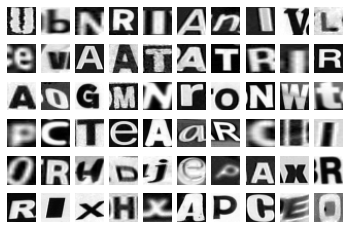

In [8]:
dataiter = iter(load_dataset())
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
load_dataset()

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
device

'cuda'

In [12]:
# defining the model architecture
class Net(torch.nn.Module):   
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = torch.nn.Sequential(
          # Defining a 2D convolution layer
          torch.nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1),
          torch.nn.BatchNorm2d(128),
          torch.nn.ReLU(inplace=True),
          torch.nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          torch.nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
          torch.nn.BatchNorm2d(128),
          torch.nn.ReLU(inplace=True),
          torch.nn.MaxPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = torch.nn.Sequential(
          torch.nn.Linear(128 * 7 * 7, 63)
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      # print(x.size)
      x = self.linear_layers(x)
      return x

In [13]:
model = Net()
# optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

cc = torch.nn.CrossEntropyLoss()

model.cuda()
cc = cc.cuda()

In [14]:
model

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=6272, out_features=63, bias=True)
  )
)

In [15]:
for i in range(30):
    running_loss = 0
    for batch_idx, (images, labels) in enumerate(load_dataset()):
        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = cc(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(load_dataset())))


Epoch 1 - Training loss: 2.6299318342792746
Epoch 2 - Training loss: 1.266061888665569
Epoch 3 - Training loss: 1.029972419142723
Epoch 4 - Training loss: 0.8772061093121158
Epoch 5 - Training loss: 0.7388597208322311
Epoch 6 - Training loss: 0.6751072840118895
Epoch 7 - Training loss: 0.5606623250154816
Epoch 8 - Training loss: 0.5231542096150165
Epoch 9 - Training loss: 0.4680153228038428
Epoch 10 - Training loss: 0.41698990017175674
Epoch 11 - Training loss: 0.391155127968107
Epoch 12 - Training loss: 0.3590970816356795
Epoch 13 - Training loss: 0.30464253850205214
Epoch 14 - Training loss: 0.2670100870333156
Epoch 15 - Training loss: 0.2559660838498753
Epoch 16 - Training loss: 0.2270271936621593
Epoch 17 - Training loss: 0.21650315686224067
Epoch 18 - Training loss: 0.22151087830793492
Epoch 19 - Training loss: 0.20112429726488737
Epoch 20 - Training loss: 0.1652718718942939
Epoch 21 - Training loss: 0.14512722124820765
Epoch 22 - Training loss: 0.13480370953603057
Epoch 23 - Trai

In [16]:
torch.save(model, './model_character_detect.pt')

In [17]:
running_loss


21.419989068061113

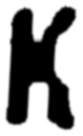

In [18]:
image = Image.open("../../Images/segmentation2/image_2_ROI_5.png")
image


In [19]:
mm = torch.load('./model_character_detect.pt')

In [20]:
image = image.resize((28,28))

In [21]:
# from PIL import ImageOps
# # image = ImageOps.grayscale(image)

In [22]:
image = transform(image)
image = image.cuda()

In [23]:
mm


Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=6272, out_features=63, bias=True)
  )
)

In [24]:
# image = image.cuda()
lp = mm(image[None, ...])

In [25]:
ps = torch.exp(lp)
probab = list(ps.cpu()[0])
pred_label = probab.index(max(probab))

In [26]:
pred_label

20

In [27]:
max(probab)

tensor(1.5653e+10, grad_fn=<UnbindBackward>)

In [28]:
label_list[pred_label]

'K'